# Setup

In [88]:
# read data into mydata dict:
in1='/private/tmp/JG/PYTHON/0.in'
exec(open(in1).read())

In [89]:
mydata.keys()

dict_keys(['mpi+omp', 'mpi+omp+acc', 'mpi+omp+cuda', 'mpi+omp+target'])

In [56]:
for dim in mydata['mpi+omp'].keys():
    # dim = ['large', 'medium', 'small', 'xsmall']
    # exe = ['mpi+omp', 'mpi+omp+acc', 'mpi+omp+cuda', 'mpi+omp+target']
    for exe in mydata.keys():
        print(dim, exe, end=' ')
        try:
            print(mydata[exe][dim]['pe'], mydata[exe][dim]['tot_neighb'])
        except:
            print('x -1')
    print()

large mpi+omp PrgEnv-pgi -1
large mpi+omp+acc x -1
large mpi+omp+cuda PrgEnv-gnu 6746728736
large mpi+omp+target PrgEnv-cray 6746728736

medium mpi+omp PrgEnv-pgi 249279719
medium mpi+omp+acc x -1
medium mpi+omp+cuda PrgEnv-gnu 249279719
medium mpi+omp+target PrgEnv-cray 249279719

small mpi+omp PrgEnv-pgi 6748609
small mpi+omp+acc PrgEnv-pgi 6751293
small mpi+omp+cuda PrgEnv-gnu 6753118
small mpi+omp+target PrgEnv-cray 6748609

xsmall mpi+omp PrgEnv-pgi 6707644
xsmall mpi+omp+acc PrgEnv-pgi 6707644
xsmall mpi+omp+cuda PrgEnv-gnu 6707644
xsmall mpi+omp+target PrgEnv-cray 6707644



In [90]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [91]:
labels = list(mydata['mpi+omp'].keys())
# ['large', 'medium', 'small', 'xsmall']
exes = list(mydata.keys())
# ['mpi+omp', 'mpi+omp+acc', 'mpi+omp+cuda', 'mpi+omp+target']

In [92]:
labels

['large', 'medium', 'small', 'xsmall']

In [93]:
exes

['mpi+omp', 'mpi+omp+acc', 'mpi+omp+cuda', 'mpi+omp+target']

# Total Neighbors

In [94]:
tot_ngb = []
# mydata['mpi+omp']['large']['tot_neighb'],
# mydata['mpi+omp']['medium']['tot_neighb'],
# mydata['mpi+omp']['small']['tot_neighb'],
for exe in exes:
# for dim in labels:
    # print(dim)
    tmp = []
    for dim in labels:
        try:
            # print(mydata[exe][dim]['pe'], mydata[exe][dim]['tot_neighb'])            
            tmp.append(mydata[exe][dim]['tot_neighb'])
        except:
            # print('x -1')
            tmp.append(-1)
    tot_ngb.append(tmp)
    print(tot_ngb)
exe0 = tot_ngb[0]
exe1 = tot_ngb[1]
exe2 = tot_ngb[2]
exe3 = tot_ngb[3]

[[-1, 249279719, 6748609, 6707644]]
[[-1, 249279719, 6748609, 6707644], [-1, -1, 6751293, 6707644]]
[[-1, 249279719, 6748609, 6707644], [-1, -1, 6751293, 6707644], [6746728736, 249279719, 6753118, 6707644]]
[[-1, 249279719, 6748609, 6707644], [-1, -1, 6751293, 6707644], [6746728736, 249279719, 6753118, 6707644], [6746728736, 249279719, 6748609, 6707644]]


In [95]:
for i in range(len(tot_ngb)):
    print(i, tot_ngb[i], min(tot_ngb[i]), max(tot_ngb[i]), max(tot_ngb[i])-min(tot_ngb[i]))

0 [-1, 249279719, 6748609, 6707644] -1 249279719 249279720
1 [-1, -1, 6751293, 6707644] -1 6751293 6751294
2 [6746728736, 249279719, 6753118, 6707644] 6707644 6746728736 6740021092
3 [6746728736, 249279719, 6748609, 6707644] 6707644 6746728736 6740021092


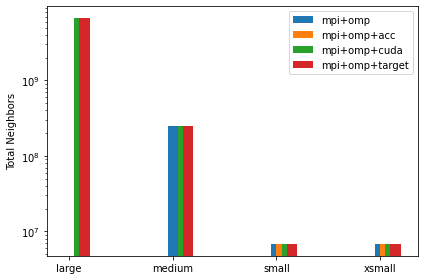

In [102]:
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars
fig, ax = plt.subplots()
rects0 = ax.bar(x, exe0, width, label=exes[0])
rects1 = ax.bar(x + width/2, exe1, width, label=exes[1])
rects2 = ax.bar(x + width, exe2, width, label=exes[2])
rects3 = ax.bar(x + 3*width/2, exe3, width, label=exes[3])
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Neighbors')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yscale('log')

# # Add a table at the bottom of the axes
# cell_text = []
# for row in range(n_rows):
    # plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    # y_offset = y_offset + data[row]
    # cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# the_table = plt.table(cellText=cell_text,
#                       rowLabels=rows,
#                       rowColours=colors,
#                       colLabels=columns,
#                       loc='bottom')
# # Adjust layout to make room for the table:
# plt.subplots_adjust(left=0.2, bottom=0.2)

fig.tight_layout()
plt.show()

In [100]:
tot_ngb

[[-1, 249279719, 6748609, 6707644],
 [-1, -1, 6751293, 6707644],
 [6746728736, 249279719, 6753118, 6707644],
 [6746728736, 249279719, 6748609, 6707644]]

In [77]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Avg neighbor count per particle

In [78]:
plot_data = []
for exe in exes:
    tmp = []
    for dim in labels:
        try:
            tmp.append(mydata[exe][dim]['avg_neighb'])
        except:            
            tmp.append(-1)    
    plot_data.append(tmp)
    # print(plot_data)
exe0 = plot_data[0]
exe1 = plot_data[1]
exe2 = plot_data[2]
exe3 = plot_data[3]

In [79]:
for i in range(len(plot_data)):
    print(i, plot_data[i], min(plot_data[i]), max(plot_data[i]), max(plot_data[i])-min(plot_data[i]))

0 [-1, 249, 249, 248] -1 249 250
1 [-1, -1, 250, 248] -1 250 251
2 [249, 249, 250, 248] 248 250 2
3 [249, 249, 249, 248] 248 249 1


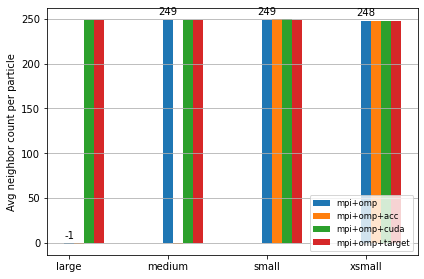

In [80]:
x = np.arange(len(labels))  # the label locations
width = 0.10  # the width of the bars
fig, ax = plt.subplots()

rects0 = ax.bar(x, exe0, width, label=exes[0])
rects1 = ax.bar(x+width, exe1, width, label=exes[1])
rects2 = ax.bar(x+2*width, exe2, width, label=exes[2])
rects3 = ax.bar(x+3*width, exe3, width, label=exes[3])

autolabel(rects0)
#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg neighbor count per particle')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right', fontsize='small')
ax.set_yscale('linear')
plt.grid(axis='y')
fig.tight_layout()
plt.show()

# Total energy

In [81]:
plot_data = []
for exe in exes:
    tmp = []
    for dim in labels:
        try:
            tmp.append(mydata[exe][dim]['tot_nrg'])
        except:            
            tmp.append(-1)    
    plot_data.append(tmp)
exe0 = plot_data[0]
exe1 = plot_data[1]
exe2 = plot_data[2]
exe3 = plot_data[3]

In [82]:
for i in range(len(plot_data)):
    print(i, plot_data[i], min(plot_data[i]), max(plot_data[i]), max(plot_data[i])-min(plot_data[i]))

0 [-1, 20898200000.0, 20874500000.0, 20814700000.0] -1 20898200000.0 20898200001.0
1 [-1, -1, 84474000000000.0, 20873700000.0] -1 84474000000000.0 84474000000001.0
2 [20846800000.0, 20898200000.0, 20857000000.0, 20814700000.0] 20814700000.0 20898200000.0 83500000.0
3 [20846800000.0, 20898200000.0, 20874500000.0, 20814700000.0] 20814700000.0 20898200000.0 83500000.0


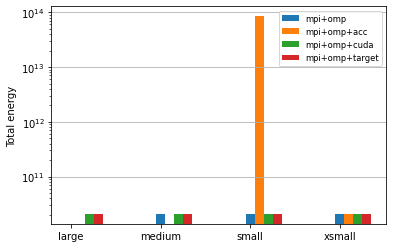

In [83]:
x = np.arange(len(labels))  # the label locations
width = 0.10  # the width of the bars
fig, ax = plt.subplots()

rects0 = ax.bar(x, exe0, width, label=exes[0])
rects1 = ax.bar(x+width, exe1, width, label=exes[1])
rects2 = ax.bar(x+2*width, exe2, width, label=exes[2])
rects3 = ax.bar(x+3*width, exe3, width, label=exes[3])

#autolabel(rects0)
#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total energy')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right', fontsize='small')
ax.set_yscale('log')
plt.grid(axis='y')
# fig.tight_layout()
plt.show()

# Internal energy

In [84]:
plot_data = []
for exe in exes:
    tmp = []
    for dim in labels:
        try:
            tmp.append(mydata[exe][dim]['int_nrg'])
        except:            
            tmp.append(-1)    
    plot_data.append(tmp)
exe0 = plot_data[0]
exe1 = plot_data[1]
exe2 = plot_data[2]
exe3 = plot_data[3]

In [85]:
for i in range(len(plot_data)):
    print(i, plot_data[i], min(plot_data[i]), max(plot_data[i]), max(plot_data[i])-min(plot_data[i]))

0 [-1, -11998800.0, 1991160.0, -254600.0] -11998800.0 1991160.0 13989960.0
1 [-1, -1, 4017490000000.0, -2695120.0] -2695120.0 4017490000000.0 4017492695120.0
2 [-2960200.0, -11998800.0, 703946.0, -254600.0] -11998800.0 703946.0 12702746.0
3 [-2960200.0, -11998800.0, 1991160.0, -254600.0] -11998800.0 1991160.0 13989960.0


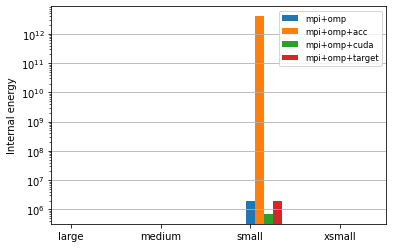

In [86]:
x = np.arange(len(labels))  # the label locations
width = 0.10  # the width of the bars
fig, ax = plt.subplots()

rects0 = ax.bar(x, exe0, width, label=exes[0])
rects1 = ax.bar(x+width, exe1, width, label=exes[1])
rects2 = ax.bar(x+2*width, exe2, width, label=exes[2])
rects3 = ax.bar(x+3*width, exe3, width, label=exes[3])

#autolabel(rects0)
#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Internal energy')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right', fontsize='small')
ax.set_yscale('log')
plt.grid(axis='y')
# fig.tight_layout()
plt.show()